In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2015 - 2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#rows and columns
df.shape

(158, 12)

In [5]:
#check missing values
df.isnull().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [6]:
print(df["Happiness Score"].min())
df["Happiness Score"].max()

2.839


7.587

In [7]:
# Define the bins and labels
bins = [3,6,7,float('inf')]
labels = ['0-3', '3-6', '7+']

# Create age groups
df['Happiness Group'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Age Group Distribution')

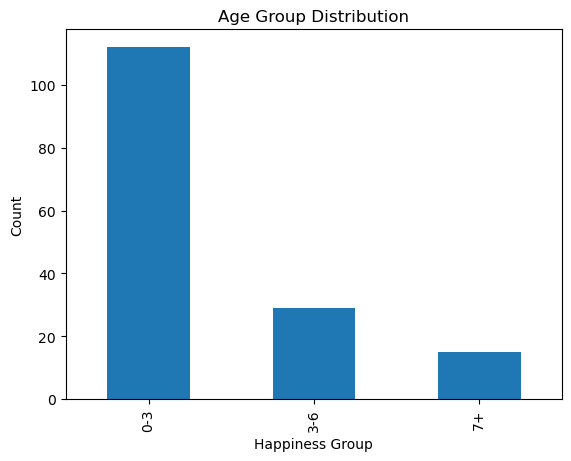

In [8]:

# Count the number of occurrences in each bin
happiness_group_counts = df['Happiness Group'].value_counts().sort_index()

# Plot the bar chart
happiness_group_counts.plot(kind='bar')
plt.xlabel('Happiness Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Group
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7+
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7+
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7+
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7+
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7+


In [10]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder
x = [['Western Europe',1], ['North America',2], ['Australia and New Zealand',3],
       ['Middle East and Northern Africa',4], ['Latin America and Caribbean',5],
       ['Southeastern Asia',6], ['Central and Eastern Europe',7], ['Eastern Asia',8],
       ['Sub-Saharan Africa',9], ['Southern Asia',10]]
enc = OneHotEncoder()
encoded = enc.fit_transform(x)

In [12]:
print(encoded)

  (0, 9)	1.0
  (0, 10)	1.0
  (1, 5)	1.0
  (1, 11)	1.0
  (2, 0)	1.0
  (2, 12)	1.0
  (3, 4)	1.0
  (3, 13)	1.0
  (4, 3)	1.0
  (4, 14)	1.0
  (5, 6)	1.0
  (5, 15)	1.0
  (6, 1)	1.0
  (6, 16)	1.0
  (7, 2)	1.0
  (7, 17)	1.0
  (8, 8)	1.0
  (8, 18)	1.0
  (9, 7)	1.0
  (9, 19)	1.0


In [17]:
# Create a pivot table for the stacked bar chart
pivot_table = df.pivot_table(index='Happiness Group', columns='Region', aggfunc='size', fill_value=0)
pivot_table

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Happiness Group,,,,,,,,,,
0-3,0,27,5,9,14,0,7,7,38,5
3-6,0,2,1,11,5,0,2,0,0,8
7+,2,0,0,2,1,2,0,0,0,8


Text(0, 0.5, 'Number of Responses')

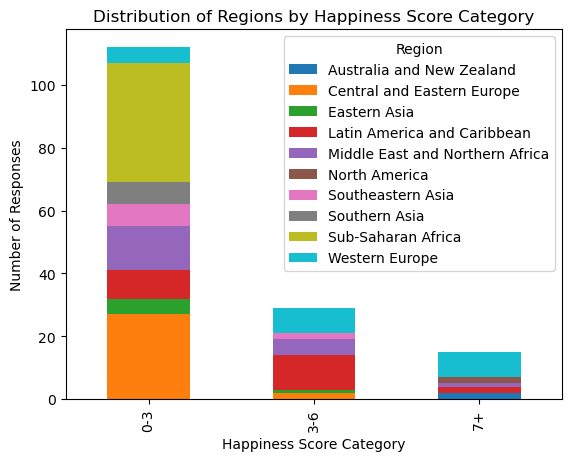

In [15]:
# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Distribution of Regions by Happiness Score Category')
plt.xlabel('Happiness Score Category')
plt.ylabel('Number of Responses')

In [36]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Group
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7+
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7+
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7+
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7+
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7+


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Economy (GDP per Capita)"] = scaler.fit_transform(df["Economy (GDP per Capita)"].values.reshape(-1,1))

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

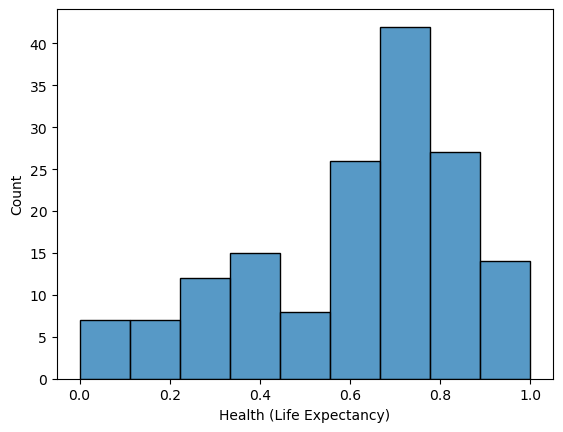

In [54]:
df["Health (Life Expectancy)"] = scaler.fit_transform(df["Health (Life Expectancy)"].values.reshape(-1,1))
sns.histplot(df["Health (Life Expectancy)"])

In [38]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Group
0,Switzerland,Western Europe,1,7.587,0.03411,0.826132,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7+
1,Iceland,Western Europe,2,7.561,0.04884,0.770412,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7+
2,Denmark,Western Europe,3,7.527,0.03328,0.784113,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7+
3,Norway,Western Europe,4,7.522,0.03880,0.863099,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7+
4,Canada,North America,5,7.427,0.03553,0.784592,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7+


<Axes: >

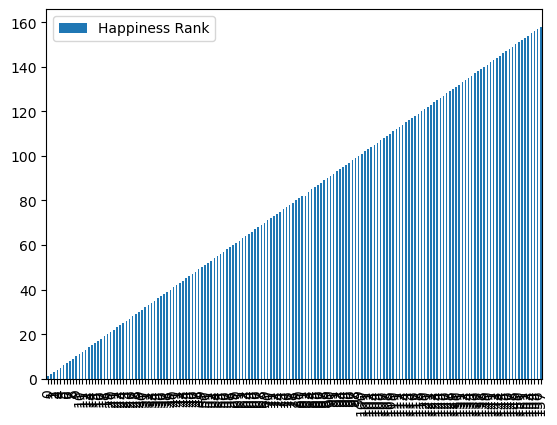

In [80]:
# Calculate counts for each category
region_happiness = df[['Region', 'Happiness Rank']]

# Plotting the counts using a bar plot
region_happiness.plot(kind='bar', stacked=True)


In [40]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-Squared Test Statistic: 1415.3258620689655
p-value: 0.4107040079831256
Degrees of Freedom: 1404
Expected Frequencies:
 [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]


In [41]:
#check for catagorical data inconsistency
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
df_filtered = pd.DataFrame(df[numerical_columns])

In [44]:
# Calculate the covariance matrix for the filtered DataFrame
cov_matrix = df_filtered.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                               Happiness Rank  Happiness Score  \
Happiness Rank                    2093.461743       -51.975613   
Happiness Score                    -51.975613         1.311048   
Standard Error                       0.124358        -0.003480   
Economy (GDP per Capita)            -8.568215         0.213246   
Family                              -9.142720         0.230969   
Health (Life Expectancy)            -8.316021         0.204881   
Freedom                             -3.839647         0.098042   
Trust (Government Corruption)       -2.044785         0.054316   
Generosity                          -0.928243         0.026156   
Dystopia Residual                  -13.220847         0.336225   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.124358                 -8.568215   
Happiness Score                     -0.003480                  0.213246   
Standard Error               

Text(0.5, 1.0, 'Covariance Matrix Heatmap')

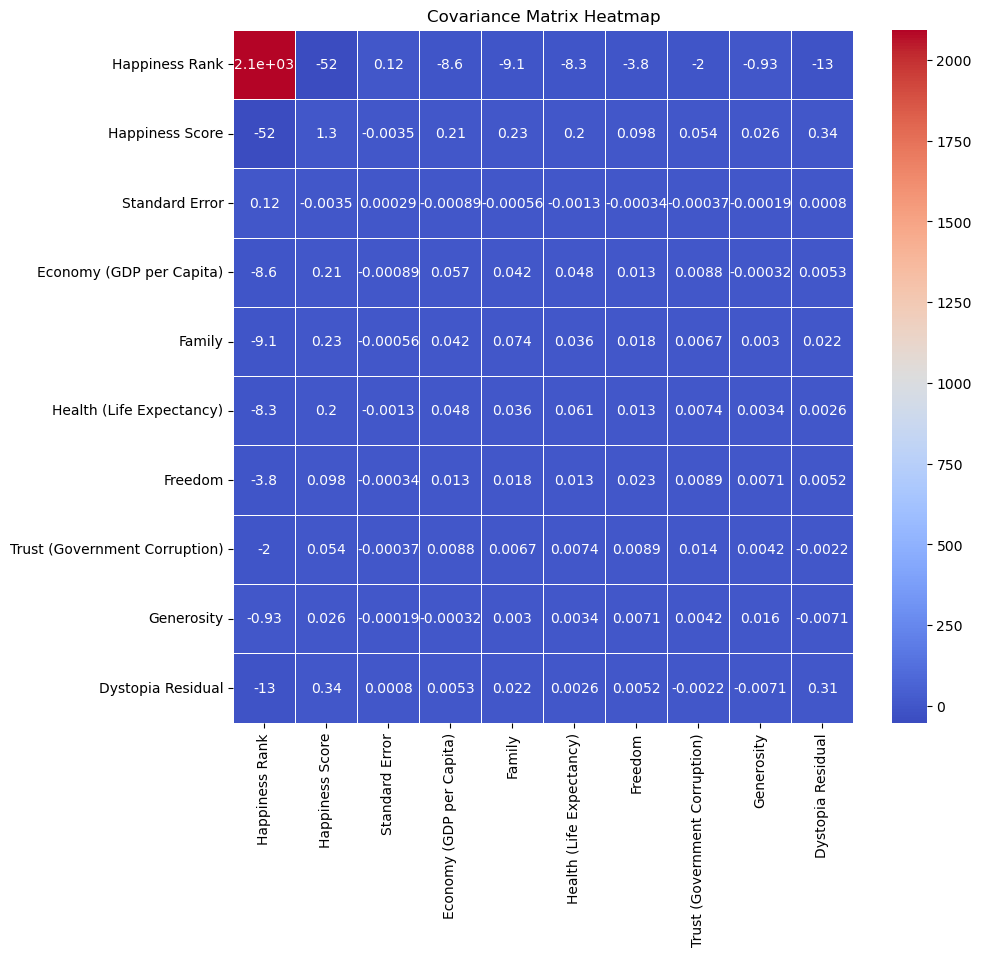

In [46]:
# Visualize the covariance matrix with a heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')